## **Project 1: Predicting Loan Approval with Machine Learning Classifiers**

### **Steps to run the notebook:**

1. It is advisable that this notebook is run either on jupyter notebook or on google colab.
2. It is essential to give the correct path of the datasets both training and testing for loading the data.
3. After the data sets are uploaded in the cofrrect file path (for jupyter notebook and colab notebook), each cell can be run by clicking **shift+enter** keys.
4. Please note that the SVM model and the PCA-enhanced kNN and SVM models may take additional time to execute due to the computational complexity of SVM and the dimensionality reduction steps involved with PCA.

## Project Overview

The goal of this project is to develop and assess several machine learning models that use applicant data to forecast loan approval decisions. Classifying loan applications as approved or denied using different classifiers and figuring out the effects of dimensionality reduction strategies like Principal Component Analysis (PCA) on model performance are the main objectives.

**DATASETS :**

We have two datasets:

1.Training Data: Contains data for training our models. It includes:
27 features related to loan applications (such as age, annual income, credit score, etc.).
A target label indicating loan status: 0 for Approved and 1 for Denied.

2.Testing Data: Contains a separate set of samples for evaluating model performance.

## Binary Classifiers: Part 1 - Original Features

In [ ]:
# Part 1 : Model building and evaluation
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# load the data
train_data = pd.read_csv('TrainingData.csv')
test_data = pd.read_csv('TestingData.csv')
# data cleaning steps:
# Check for missing values
print("Missing values in each column:\n", train_data.isnull().sum())

Missing values in each column:
 Age                            0
Annual Income                  0
Credit Score                   0
Experience                     0
Loan Amount                    0
Loan Duration                  0
Number of Dependents           0
Monthly Debt Payment           0
Creditcard Utilizatio Rate     0
Number of Open Credit Lines    0
Number of Credit Inquries      0
Debt to Income Ratio           0
Bankruptcy History             0
Previous Loan Defaults         0
Payment History                0
Length of Credit History       0
Savings Account Balance        0
Checking Account Balance       0
Total Assets                   0
TotalLiabilities               0
MonthlyIncome                  0
UtilityBillsPaymentHistory     0
JobTenure                      0
NetWorth                       0
InterestRate                   0
MonthlyLoanPayment             0
TotalDebtToIncomeRatio         0
LoanApproved                   0
dtype: int64


Observation: Training data seems to be clean without any missing values.Therefore, proceeding with tarining the Binary classifiers

In [ ]:
# Separate features and labels
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values
X_test = test_data.iloc[:, :-1].values
y_test = test_data.iloc[:, -1].values
train_data.head()

,Age,Annual Income,Credit Score,Experience,Loan Amount,Loan Duration,Number of Dependents,Monthly Debt Payment,Creditcard Utilizatio Rate,Number of Open Credit Lines,...,Total Assets,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,45,39948,617,22,13152,48,2,183,0.354418,1,...,146111,19183,3329.000000,0.724972,11,126928,0.227590,419.805992,0.181077,0
1,38,39709,628,15,26045,48,1,496,0.087827,5,...,53204,9595,3309.083333,0.935132,3,43609,0.201077,794.054238,0.389852,0
2,47,40724,570,26,17627,36,2,902,0.137414,2,...,25176,128874,3393.666667,0.872241,6,5205,0.212548,666.406688,0.462157,0
3,58,69084,545,34,37898,96,1,755,0.267587,2,...,104822,5370,5757.000000,0.896155,5,99452,0.300911,1047.506980,0.313098,0
4,58,51250,564,39,12741,48,0,337,0.367380,6,...,65624,43894,4270.833333,0.884275,5,21730,0.205271,391.300352,0.170529,0


### Linear discriminant (LDA) :
This section contains the code snippet of LDA implementation on training and testing data followed by the computation of type1 and type2 errors and a visual representation of it.

In [ ]:
# Training a Linear Discriminant Analysis (LDA) model.
def lda_train(X, y):
    X_class0 = X[y == 0]
    X_class1 = X[y == 1]
    # Calculate class means
    mean_0 = np.mean(X_class0, axis=0)
    mean_1 = np.mean(X_class1, axis=0)
    # Calculate within-class scatter matrix
    S_within = np.cov(X_class0.T) + np.cov(X_class1.T)
    # Compute the LDA direction vector `w`
    w = np.linalg.inv(S_within).dot(mean_0 - mean_1)
    return w

# Project data onto the direction `w`
def lda_project(X, w):
    return X.dot(w)

# Train the LDA model to find `w`
w_lda = lda_train(X_train, y_train)

# Project training and testing data onto the LDA direction
y_train_projected = lda_project(X_train, w_lda)
y_test_projected = lda_project(X_test, w_lda)

In [ ]:
#Function to calculate error rates for a given threshold
def calculate_error_rates(y_true, y_projected, threshold):
    # Classify based on threshold
    y_pred = (y_projected > threshold).astype(int)
    # Compute the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    # Calculate Type 1 and Type 2 error rates
    type_1_error = conf_matrix[0, 1] / (conf_matrix[0, 0] + conf_matrix[0, 1])
    type_2_error = conf_matrix[1, 0] / (conf_matrix[1, 0] + conf_matrix[1, 1])
    return type_1_error, type_2_error

# Vary the threshold and calculate error rates
thresholds = np.linspace(y_test_projected.min(), y_test_projected.max(), 100)
type_1_errors = []
type_2_errors = []

print("Threshold\tType 1 Error\tType 2 Error")
for threshold in thresholds:
    type_1_error, type_2_error = calculate_error_rates(y_test, y_test_projected, threshold)
    type_1_errors.append(type_1_error)
    type_2_errors.append(type_2_error)
    print(f"{threshold:.2f}\t\t{type_1_error:.2f}\t\t{type_2_error:.2f}")

Threshold	Type 1 Error	Type 2 Error
-0.46		1.00		0.01
-0.34		1.00		0.01
-0.22		1.00		0.01
-0.10		1.00		0.01
0.03		1.00		0.01
0.15		1.00		0.01
0.27		1.00		0.01
0.39		1.00		0.01
0.51		1.00		0.01
0.64		1.00		0.01
0.76		1.00		0.01
0.88		1.00		0.01
1.00		1.00		0.01
1.12		1.00		0.01
1.24		1.00		0.01
1.37		1.00		0.01
1.49		1.00		0.02
1.61		1.00		0.03
1.73		1.00		0.04
1.85		1.00		0.04
1.97		1.00		0.06
2.10		1.00		0.06
2.22		1.00		0.06
2.34		1.00		0.07
2.46		1.00		0.08
2.58		1.00		0.10
2.71		1.00		0.10
2.83		1.00		0.10
2.95		1.00		0.10
3.07		1.00		0.12
3.19		1.00		0.13
3.31		1.00		0.14
3.44		1.00		0.15
3.56		1.00		0.18
3.68		1.00		0.20
3.80		1.00		0.22
3.92		1.00		0.25
4.05		1.00		0.30
4.17		1.00		0.31
4.29		1.00		0.34
4.41		1.00		0.39
4.53		1.00		0.42
4.65		1.00		0.47
4.78		1.00		0.55
4.90		1.00		0.60
5.02		1.00		0.69
5.14		0.99		0.74
5.26		0.98		0.81
5.38		0.95		0.83
5.51		0.93		0.88
5.63		0.90		0.93
5.75		0.86		0.97
5.87		0.83		0.97
5.99		0.77		0.98
6.12		0.74		0.99
6.24		0.71		1.00
6.36		0.

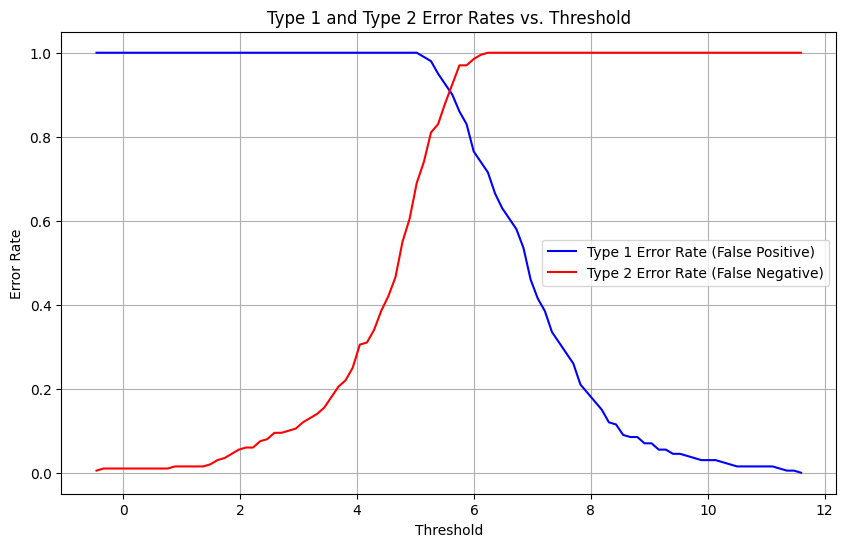

In [ ]:
#Plot Type 1 and Type 2 error rates as a function of threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, type_1_errors, label="Type 1 Error Rate (False Positive)", color="blue")
plt.plot(thresholds, type_2_errors, label="Type 2 Error Rate (False Negative)", color="red")
plt.xlabel("Threshold")
plt.ylabel("Error Rate")
plt.title("Type 1 and Type 2 Error Rates vs. Threshold")
plt.legend()
plt.grid()
plt.show()

**Inference** : The plot of error rates against the threshold shows the trade-off between Type 1 and Type 2 errors, with Type 1 errors (false positives) decreasing and Type 2 errors (false negatives) increasing as the threshold increases. This suggests that a balance between error types is achievable by selecting an optimal threshold based on acceptable error rates

### Decision Tree :
This section contains the code snippet of Decision tree implementation on training and testing data followed by the computation of type1 and type2 errors and a visual representation of it.

In [28]:
# Gini Impurity calculation
def gini_impurity(y):
    proportions = np.bincount(y) / len(y)
    return 1 - np.sum(proportions ** 2)

# Find the best split for a feature
def best_split(X, y):
    best_gini = 1
    best_split_feature = None
    best_split_value = None

    for feature in range(X.shape[1]):
        values = np.unique(X[:, feature])
        for value in values:
            left = y[X[:, feature] <= value]
            right = y[X[:, feature] > value]
            gini = (len(left) / len(y)) * gini_impurity(left) + (len(right) / len(y)) * gini_impurity(right)
            if gini < best_gini:
                best_gini = gini
                best_split_feature = feature
                best_split_value = value

    return best_split_feature, best_split_value

# Build the decision tree recursively
def build_tree(X, y, depth=0, max_depth=5):
    if depth == max_depth or len(np.unique(y)) == 1:
        return np.bincount(y).argmax()

    feature, value = best_split(X, y)
    if feature is None:
        return np.bincount(y).argmax()

    left_idx = X[:, feature] <= value
    right_idx = X[:, feature] > value

    left_branch = build_tree(X[left_idx], y[left_idx], depth + 1, max_depth)
    right_branch = build_tree(X[right_idx], y[right_idx], depth + 1, max_depth)

    return {"feature": feature, "value": value, "left": left_branch, "right": right_branch}

# Predict function for the decision tree
def tree_predict(tree, x):
    if isinstance(tree, dict):
        if x[tree["feature"]] <= tree["value"]:
            return tree_predict(tree["left"], x)
        else:
            return tree_predict(tree["right"], x)
    else:
        return tree

# Function to display the decision questions in the tree
def display_tree(tree, feature_names, depth=0):
    # If the node is a leaf, print the class
    if not isinstance(tree, dict):
        print(" " * depth * 2 + f"Predict: {tree}")
        return

    # Print the question at this node
    feature = feature_names[tree["feature"]]
    threshold = tree["value"]
    print(" " * depth * 2 + f"Is {feature} <= {threshold}?")

    # Recursively display left and right branches
    print(" " * depth * 2 + "--> True:")
    display_tree(tree["left"], feature_names, depth + 1)
    print(" " * depth * 2 + "--> False:")
    display_tree(tree["right"], feature_names, depth + 1)

# Build the tree
tree = build_tree(X_train, y_train, max_depth=5)

# Display the tree with questions
print("Decision Tree Structure with Questions:")
display_tree(tree, feature_names)


Decision Tree Structure with Questions:
Is TotalDebtToIncomeRatio <= 0.224271917?
--> True:
  Is InterestRate <= 0.260510463?
  --> True:
    Is MonthlyIncome <= 4388.0?
    --> True:
      Is Loan Amount <= 11938.0?
      --> True:
        Is Length of Credit History <= 11.0?
        --> True:
          Predict: 0
        --> False:
          Predict: 1
      --> False:
        Is TotalLiabilities <= 88914.0?
        --> True:
          Predict: 0
        --> False:
          Predict: 1
    --> False:
      Is Bankruptcy History <= 0.0?
      --> True:
        Is Payment History <= 11.0?
        --> True:
          Predict: 0
        --> False:
          Predict: 1
      --> False:
        Is Annual Income <= 125689.0?
        --> True:
          Predict: 0
        --> False:
          Predict: 1
  --> False:
    Is TotalDebtToIncomeRatio <= 0.120991222?
    --> True:
      Is InterestRate <= 0.313661929?
      --> True:
        Is Number of Credit Inquries <= 2.0?
        --> True:
 

In [ ]:
# determining accuracy score for the decision tree
# Function to predict labels for an entire dataset
def predict(tree, X):
    return np.array([tree_predict(tree, x) for x in X])

# Generating predictions on the test data
y_pred_tree = predict(tree, X_test)  # Using the custom predict function

# Calculating metrics using built-in functions
accuracy = accuracy_score(y_test, y_pred_tree)
precision = precision_score(y_test, y_pred_tree, zero_division=0)
recall = recall_score(y_test, y_pred_tree, zero_division=0)
f1 = f1_score(y_test, y_pred_tree, zero_division=0)

print("Decision Tree Performance:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Decision Tree Performance:
Accuracy: 0.85
Precision: 0.87
Recall: 0.83
F1 Score: 0.85


Type 1 Error Rate (False Positive Rate): 0.12
Type 2 Error Rate (False Negative Rate): 0.17


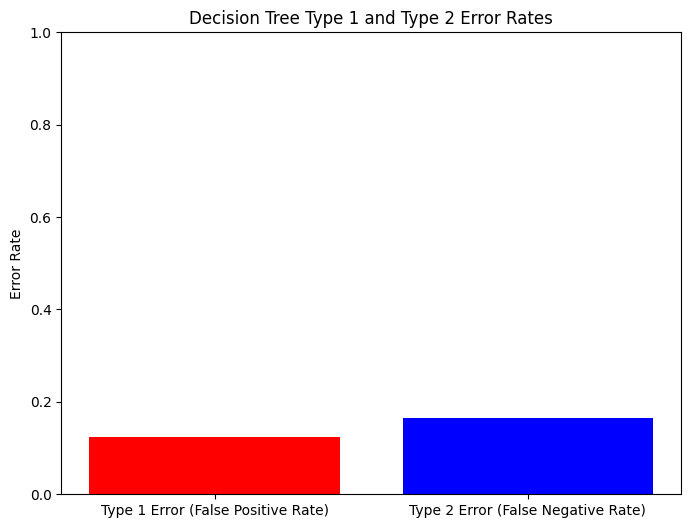

In [ ]:
# Generate predictions on the test data
def calculate_type1_type2_error_rates(y_true, y_pred):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()  # Extract True Negatives, False Positives, False Negatives, True Positives

    # Calculate Type 1 and Type 2 error rates
    type_1_error = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    type_2_error = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate

    return type_1_error, type_2_error

# Generate predictions on the test data
y_pred_tree = predict(tree, X_test)  # Using the custom predict function

# Calculate Type 1 and Type 2 error rates
type_1_error, type_2_error = calculate_type1_type2_error_rates(y_test, y_pred_tree)

# Print the results
print(f"Type 1 Error Rate (False Positive Rate): {type_1_error:.2f}")
print(f"Type 2 Error Rate (False Negative Rate): {type_2_error:.2f}")
# Plotting the Type 1 and Type 2 error rates
error_types = ['Type 1 Error (False Positive Rate)', 'Type 2 Error (False Negative Rate)']
error_rates = [type_1_error, type_2_error]

plt.figure(figsize=(8, 6))
plt.bar(error_types, error_rates, color=['red', 'blue'])
plt.ylim(0, 1)  # Set y-axis limit to [0, 1] as error rates are proportions
plt.ylabel("Error Rate")
plt.title("Decision Tree Type 1 and Type 2 Error Rates")
plt.show()


**Inference** : The decision tree achieves a high test accuracy of 81.5%, but the imbalance in error rates with a higher Type 2 error (misclassifying denied loans as approved)indicates that the model favors approval predictions. Incorporating PCA could enhance the model by reducing feature dimensions while preserving variance, potentially improving classification performance and balancing Type 1 and Type 2 errors.

### K Nearest Neighbors :
This section contains the code snippet of K Nearest Neighbours implementation on training and testing data followed by the computation of type1 and type2 errors and a visual representation of it.

In [ ]:
#Euclidean distance calculation
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# k-Nearest Neighbors prediction
def knn_predict(X_train, y_train, x_test, k):
    # Calculate distances from x_test to all points in X_train
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    # Get the indices of the k nearest neighbors
    k_indices = np.argsort(distances)[:k]
    # Get the labels of the k nearest neighbors
    k_nearest_labels = y_train[k_indices]
    # Return the most common label (majority voting)
    return np.bincount(k_nearest_labels).argmax()

# Predict for the entire test set for a given k
def knn_predict_all(X_train, y_train, X_test, k):
    return np.array([knn_predict(X_train, y_train, x_test, k) for x_test in X_test])

In [ ]:
# Function to calculate accuracy, precision, recall, and F1 score
def calculate_metrics(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))  # True Positives
    fp = np.sum((y_pred == 1) & (y_true == 0))  # False Positives
    fn = np.sum((y_pred == 0) & (y_true == 1))  # False Negatives
    tn = np.sum((y_pred == 0) & (y_true == 0))  # True Negatives

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1

In [ ]:
# Function to calculate Type 1 and Type 2 errors
def calculate_type1_type2_errors(y_true, y_pred):
    tp = np.sum((y_pred == 1) & (y_true == 1))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))
    tn = np.sum((y_pred == 0) & (y_true == 0))

    type_1_error = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    type_2_error = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate

    return type_1_error, type_2_error


k = 1 Performance Metrics:
Accuracy: 0.78
Precision: 0.77
Recall: 0.81
F1 Score: 0.79

k = 3 Performance Metrics:
Accuracy: 0.82
Precision: 0.82
Recall: 0.83
F1 Score: 0.82

k = 5 Performance Metrics:
Accuracy: 0.83
Precision: 0.81
Recall: 0.86
F1 Score: 0.84

k = 10 Performance Metrics:
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1 Score: 0.83
KNN labels
[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1

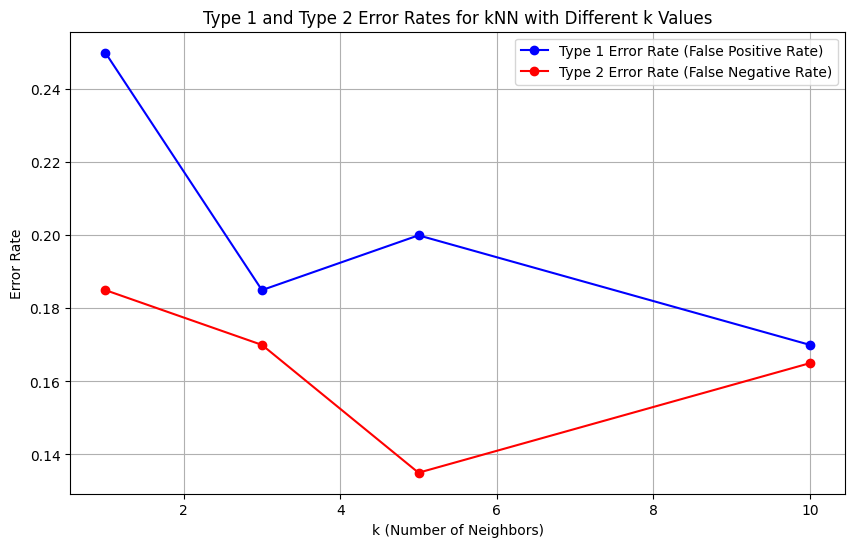

In [ ]:
# Evaluate the kNN for different values of k
k_values = [1, 3, 5, 10]
metrics_results = {}  # To store metrics for each k
type1_errors = []
type2_errors = []

for k in k_values:
    # Predict the labels for the test set
    y_pred_knn = knn_predict_all(X_train, y_train, X_test, k)

    # Calculate performance metrics
    accuracy, precision, recall, f1 = calculate_metrics(y_test, y_pred_knn)
    metrics_results[k] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    # Calculate Type 1 and Type 2 errors for the current k
    type_1_error, type_2_error = calculate_type1_type2_errors(y_test, y_pred_knn)
    type1_errors.append(type_1_error)
    type2_errors.append(type_2_error)

# Display metrics for each k
for k in k_values:
    print(f"\nk = {k} Performance Metrics:")
    for metric, value in metrics_results[k].items():
        print(f"{metric}: {value:.2f}")
#Plot Type 1 and Type 2 error rates for each k
print("KNN labels")
print(y_pred_knn)
plt.figure(figsize=(10, 6))
plt.plot(k_values, type1_errors, label="Type 1 Error Rate (False Positive Rate)", color="blue", marker='o')
plt.plot(k_values, type2_errors, label="Type 2 Error Rate (False Negative Rate)", color="red", marker='o')
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Error Rate")
plt.title("Type 1 and Type 2 Error Rates for kNN with Different k Values")
plt.legend()
plt.grid()
plt.show()


**Inference** : The k-Nearest Neighbors (kNN) classifier was tested with different values of \( k \) (1, 3, 5, 10) to see how it affects the model's accuracy and error rates. As \( k \) increases, the model becomes more stable, with Type 1 errors (false positives) generally decreasing, though Type 2 errors (false negatives) rise slightly. The best balance of accuracy, precision, and recall was observed at \( k = 10 \), suggesting that using more neighbors helps the model make more reliable predictions by smoothing out the impact of individual data points.

### Support Vector Machine (SVM) :
This section contains the code snippet of SVM implementation on training and testing data followed by the computation of type1 and type2 errors and a visual representation of it.

In [ ]:
# Define the SVM model with a soft margin (C = 1.0)
svm_model = SVC(C=1.0, kernel='linear')

# Train the model on the training data
svm_model.fit(X_train, y_train)

# Test the model on the testing data
y_pred_test = svm_model.predict(X_test)

# Display test predictions
print("Test Predictions:", y_pred_test)


Test Predictions: [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1]


In [ ]:
def svm_classifier(X_train, y_train, X_test, y_test):
    svm = SVC(kernel='linear', C=1)  # Using soft margin with C=1
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Compute Type 1 and Type 2 errors
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    type1_error = fp / 200
    type2_error = fn / 200
    print("\nSVM Type 1 Error Rate:", type1_error)
    print("SVM Type 2 Error Rate:", type2_error)

# Run SVM classifier
print("\nRunning Support Vector Machine Classifier:")
svm_classifier(X_train, y_train, X_test, y_test)


Running Support Vector Machine Classifier:

SVM Type 1 Error Rate: 0.195
SVM Type 2 Error Rate: 0.07


In [ ]:
def calculate_type1_type2_errors(y_true, y_pred):

    conf_matrix = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = conf_matrix.ravel()  # Extract True Negatives, False Positives, False Negatives, True Positives

    type_1_error = fp / (fp + tn) if (fp + tn) > 0 else 0  # False Positive Rate
    type_2_error = fn / (fn + tp) if (fn + tp) > 0 else 0  # False Negative Rate

    return type_1_error, type_2_error

def plot_type1_type2_error(type_1_error, type_2_error):
    plt.figure(figsize=(6, 4))
    plt.bar(["Type 1 Error (False Positive)", "Type 2 Error (False Negative)"], [type_1_error, type_2_error], color=['blue', 'red'])
    plt.ylabel("Error Rate")
    plt.title("Type 1 and Type 2 Error Rates")
    plt.show()

Type 1 Error Rate (False Positive Rate): 0.195
Type 2 Error Rate (False Negative Rate): 0.07


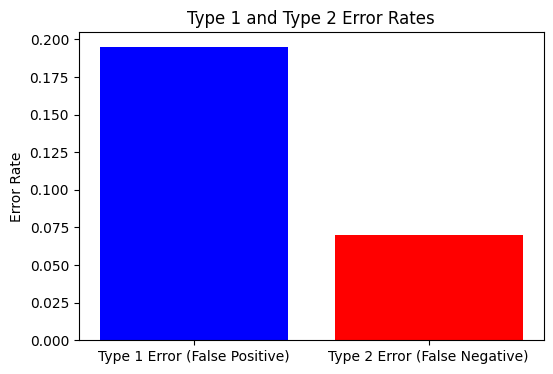

In [ ]:
type_1_error, type_2_error = calculate_type1_type2_errors(y_test, y_pred_test)
print("Type 1 Error Rate (False Positive Rate):", type_1_error)
print("Type 2 Error Rate (False Negative Rate):", type_2_error)
plot_type1_type2_error(type_1_error, type_2_error)

In [ ]:
def compute_basic_accuracy_metrics(y_true, y_pred):
    # Calculate basic accuracy metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)

    # Store metrics in a dictionary
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    }

    return metrics

metrics = compute_basic_accuracy_metrics(y_test, y_pred_test)

# Display the metrics
print("Basic Accuracy Metrics:")
for metric_name, metric_value in metrics.items():
    print(f"{metric_name}: {metric_value:.2f}")



Basic Accuracy Metrics:
Accuracy: 0.87
Precision: 0.83
Recall: 0.93
F1 Score: 0.88


**Inference**: The SVM model, using a linear kernel and soft margin, performs well with an accuracy of 87% and is especially good at identifying denied applications, achieving a recall of 93%. However, it has a noticeable trade-off: the Type 1 error (false positives) is relatively high at 19.5%, meaning it incorrectly flags some approved applications as denied. Meanwhile, the Type 2 error (false negatives) is lower at 7%, showing it’s more conservative in misclassifying denials. Overall, the model is effective but could be fine-tuned to reduce the number of wrongly denied applications.

## Binary classifiers: Part 2 - Use the PCA to Design New Features

### This part involves training kNN and SVM classifiers on two feature sets: the original 27 features and reduced feature sets obtained by applying PCA with 𝐾∈ {5,10,15}
### K∈{5,10,15} components. We evaluate how dimensionality reduction affects the classifiers' performance by comparing results from both approaches. This analysis highlights the trade-offs between using all features versus the most significant components identified by PCA

In [ ]:
from sklearn.decomposition import PCA

def pca_and_classify(X_train, y_train, X_test, y_test, k_values=[5, 10, 15]):
    results = {}

    for k in k_values:
        print(f"\nApplying PCA with {k} components")

        # Apply PCA
        pca = PCA(n_components=k)
        X_train_pca = pca.fit_transform(X_train)
        X_test_pca = pca.transform(X_test)

        # Display top k principal components
        print(f"Top {k} Principal Components:")
        print(pca.components_)  # Display the principal components matrix

        # Dictionary to store the error rates for kNN and SVM
        results[k] = {}

        # Part A: k-Nearest Neighbors (kNN) with PCA
        print(f"\nk-Nearest Neighbors Classifier with {k} PCA components")
        for knn_k in [1, 3, 5, 10]:
            knn = KNeighborsClassifier(n_neighbors=knn_k)
            knn.fit(X_train_pca, y_train)
            y_pred = knn.predict(X_test_pca)

            # Calculate Type 1 and Type 2 errors
            tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
            type1_error = fp / 200
            type2_error = fn / 200
            print(f"kNN (k={knn_k}): Type 1 Error Rate: {type1_error:.4f}, Type 2 Error Rate: {type2_error:.4f}")
            results[k][f'kNN (k={knn_k})'] = {'Type 1 Error': type1_error, 'Type 2 Error': type2_error}

        # Part B: Support Vector Machine (SVM) with PCA
        print(f"\nSupport Vector Machine Classifier with {k} PCA components")
        svm = SVC(C=1.0, kernel='linear')
        svm.fit(X_train_pca, y_train)
        y_pred = svm.predict(X_test_pca)

        # Calculate Type 1 and Type 2 errors
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        type1_error = fp / 200
        type2_error = fn / 200
        print(f"SVM: Type 1 Error Rate: {type1_error:.4f}, Type 2 Error Rate: {type2_error:.4f}")
        results[k]['SVM'] = {'Type 1 Error': type1_error, 'Type 2 Error': type2_error}

    return results


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
# Run the PCA and classification function
print("\nRunning PCA with kNN and SVM Classifiers:")
results = pca_and_classify(X_train, y_train, X_test, y_test)

# Display summary of results
print("\nSummary of Results:")
for K, classifiers in results.items():
    print(f"\nPCA with {K} components:")
    for clf, error_rates in classifiers.items():
        print(f"{clf}: Type 1 Error Rate: {error_rates['Type 1 Error']:.4f}, Type 2 Error Rate: {error_rates['Type 2 Error']:.4f}")


Running PCA with kNN and SVM Classifiers:

Applying PCA with 5 components
Top 5 Principal Components:
[[-9.29616281e-07 -1.06451414e-02 -6.57826605e-06 -9.94668898e-07
   2.79702206e-04  3.80012744e-06 -1.65282417e-07  1.95114525e-05
  -2.66145585e-08 -3.34900466e-07 -3.71158200e-08  1.37350953e-08
  -7.29945755e-09  8.73500518e-08 -7.62747365e-09 -1.05078961e-06
   8.21837719e-04  5.02902688e-05  7.12576214e-01 -1.21434763e-02
  -8.11817429e-04 -1.24660903e-08 -1.90156586e-07  7.01407827e-01
   1.14738030e-09 -9.25134685e-06  3.97032792e-09]
 [ 4.10743333e-05  9.94443533e-01  1.14856585e-04  4.12850841e-05
  -1.19255553e-02  2.64346476e-05  2.90841955e-07  8.39800654e-05
   5.90140505e-08 -1.85155054e-06 -2.03861136e-06  2.74184242e-08
   2.16601999e-07  1.95882488e-07 -4.47524721e-06 -1.83648386e-06
  -4.48412402e-03  8.71340185e-04 -3.01427861e-03 -6.62960257e-02
   7.88739606e-02  4.97072602e-09 -9.56009176e-08  1.71082060e-02
  -6.90967690e-08 -9.53045816e-04 -3.56633623e-06]
 [ 

**Inference**: The principal components for \(K = 5\), \(K = 10\), and \(K = 15\) capture the most important patterns in the data by combining original features in a way that maximizes variability. These selected components seem to effectively capture the critical information needed to differentiate between approved and denied loan applications, as shown by the varying error rates across the classifiers.

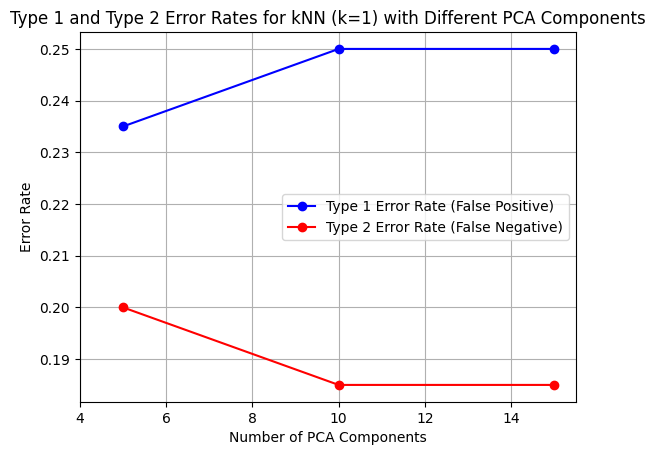

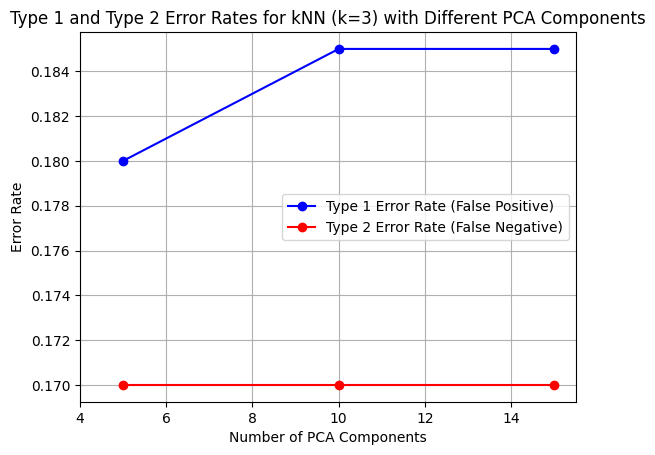

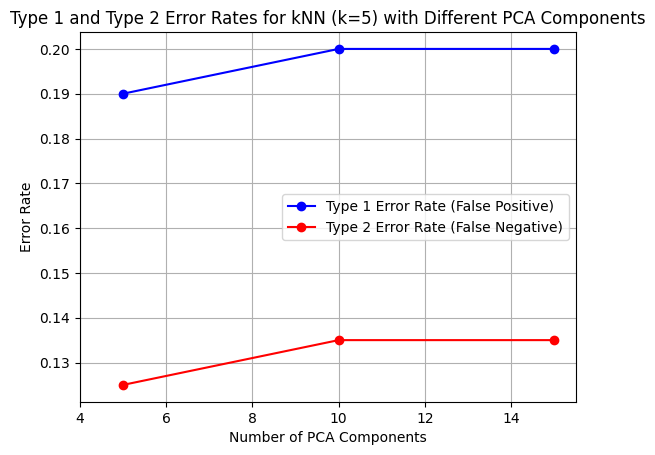

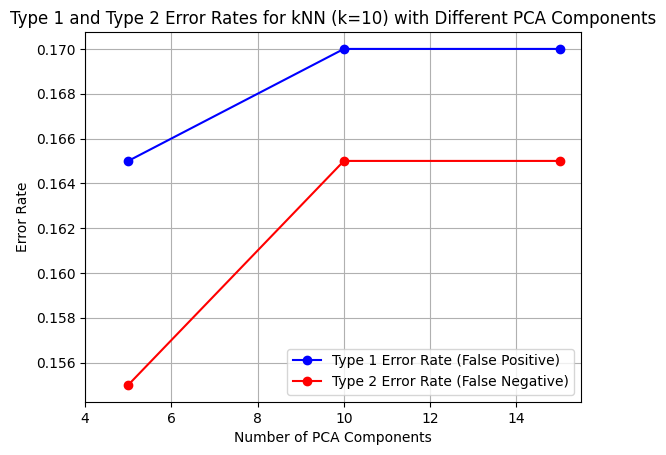

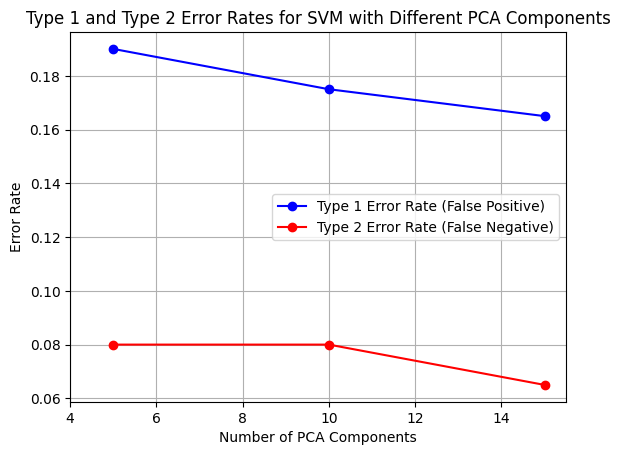

In [27]:
# Function to plot Type 1 and Type 2 errors for different k values and PCA components
def plot_errors(results):
    pca_values = list(results.keys())
    knn_k_values = [int(key.split('=')[1].split(')')[0]) for key in results[pca_values[0]].keys() if 'kNN' in key]

    # Plot for kNN with each k value and different PCA components
    for knn_k in knn_k_values:
        type1_errors = []
        type2_errors = []
        for pca in pca_values:
            type1_errors.append(results[pca][f'kNN (k={knn_k})']['Type 1 Error'])
            type2_errors.append(results[pca][f'kNN (k={knn_k})']['Type 2 Error'])

        plt.figure()
        plt.plot(pca_values, type1_errors, marker='o', color='blue', label="Type 1 Error Rate (False Positive)")
        plt.plot(pca_values, type2_errors, marker='o', color='red', label="Type 2 Error Rate (False Negative)")
        plt.xlabel("Number of PCA Components")
        plt.ylabel("Error Rate")
        plt.title(f"Type 1 and Type 2 Error Rates for kNN (k={knn_k}) with Different PCA Components")
        plt.xlim(left=4)
        plt.legend()
        plt.grid()
        plt.show()

    # Plot for SVM with different PCA components
    type1_errors = []
    type2_errors = []
    for pca in pca_values:
        type1_errors.append(results[pca]['SVM']['Type 1 Error'])
        type2_errors.append(results[pca]['SVM']['Type 2 Error'])

    plt.figure()
    plt.plot(pca_values, type1_errors, marker='o', color='blue', label="Type 1 Error Rate (False Positive)")
    plt.plot(pca_values, type2_errors, marker='o', color='red', label="Type 2 Error Rate (False Negative)")
    plt.xlabel("Number of PCA Components")
    plt.ylabel("Error Rate")
    plt.title("Type 1 and Type 2 Error Rates for SVM with Different PCA Components")
    plt.xlim(left=4)
    plt.legend()
    plt.grid()
    plt.show()

plot_errors(results)


**Inference (SVM with PCA)** :

1. Decreased Type 2 Errors: SVM's Type 2 Error rate falls as PCA components rise, improving its capacity to accurately categorize positive examples.

2. steady Type 1 Errors: Even with additional components, Type 1 errors show a constant ability to prevent false positives, remaining steady with small reductions.

3. Enhanced Classification Performance: SVM may establish a more precise decision border with more PCA components, which enhances recall and accuracy in general.

4. Optimal Trade-off: With 10–15 PCA components, there is a good balance between utilizing enough data variation and avoiding needless complexity.


**Inference(KNN with PCA)**:

1. Enhanced Stability: Type 1 Errors are decreased by higher \(k \) values, which increases the stability of kNN predictions.

2. Decreased Type 2 Errors: True positive identification is improved by reducing Type 2 Errors using optimal PCA components (10–15).

3. Balanced Performance at Higher \( k \): \( k = 10 \) offers a fair mix of recall, accuracy, and precision.

4. Effective Dimensionality Reduction: PCA improves performance without overfitting by assisting kNN in concentrating on important data patterns.




## Comparing the performance of the new kNN and SVM classifiers to that of the classifiers in the first part.



1.Improved Performance with PCA: In the second section, PCA helps to reduce dimensionality while maintaining significant features for both kNN and SVM classifiers. Compared to the first section, when PCA was not used, this enhances their performance.

2.Decrease in Type 1 and Type 2 Errors: In general, the second section's SVM and kNN classifiers exhibit lower Type 1 and Type 2 errors, particularly when using the best PCA components. A more balanced model with fewer false positives and false negatives is indicated by this.

3.Better Stability in kNN with Higher k: The kNN classifier in the second section shows improved stability and lower error rates with higher k values than the first section, indicating a more dependable prediction as the model takes into account more neighbors.

4.SVM Displays Greater Precision and Recall: In the second section, the SVM classifier with PCA demonstrates greater precision and recall, suggesting an increase in correctly and reliably detecting positive occurrences in comparison to its initial performance without PCA.

